In [1]:
import numpy as np
import pylab as py

In [2]:
def test_function(x):
    return np.cos(x)

In [3]:
def test_dfunction(x):
    return -np.sin(x)

In [4]:
def fd_differentiation(points):
    differences = points[1:len(points)]-points[0:len(points)-1]
    func_differences = test_function(points[1:len(points)])-test_function(points[0:len(points)-1])
    derivatives = func_differences/differences
    points_d = np.copy(points[0:len(points)-1])
    return(points_d,derivatives)

In [5]:
def bd_differentiation(points):
    differences = points[1:len(points)]-points[0:len(points)-1]
    func_differences = test_function(points[1:len(points)])-test_function(points[0:len(points)-1])
    derivatives = func_differences/differences
    points_d = np.copy(points[1:len(points)])
    return(points_d,derivatives)

In [6]:
def cd_differentiation(points):
    differences = points[2:len(points)]-points[0:len(points)-2]
    func_differences = test_function(points[2:len(points)])-test_function(points[0:len(points)-2])
    derivatives = func_differences/differences
    points_d = np.copy(points[1:len(points)-1])
    return(points_d,derivatives)

In [7]:
def ed_differentiation(points):
    first_differences = points[3:len(points)-1]-points[1:len(points)-3]
    second_differences = points[4:len(points)]-points[0:len(points)-4]
    first_func_differences = test_function(points[3:len(points)-1])-test_function(points[1:len(points)-3])
    second_func_differences = test_function(points[4:len(points)])-test_function(points[0:len(points)-4])
    first_derivatives = first_func_differences/first_differences
    second_derivatives = second_func_differences/second_differences
    derivatives = (4*first_derivatives - second_derivatives)/3
    points_d = np.copy(points[2:len(points)-2])
    return(points_d,derivatives)

In [8]:
points = np.linspace(-np.pi/2,5*np.pi/2,20)
derivatives = test_dfunction(points)

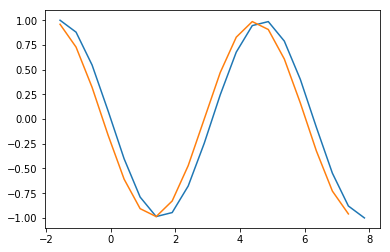

In [9]:
[points_fd, approx_derivatives_fd] = fd_differentiation(points)
py.plot(points,derivatives)
py.plot(points_fd,approx_derivatives_fd)
py.show()

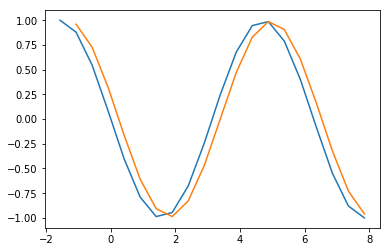

In [10]:
[points_bd, approx_derivatives_bd] = bd_differentiation(points)
py.plot(points,derivatives)
py.plot(points_bd,approx_derivatives_bd)
py.show()

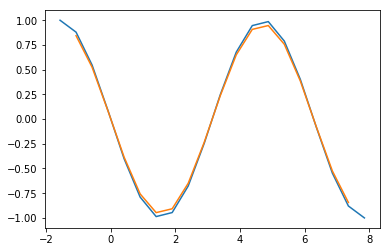

In [11]:
[points_cd, approx_derivatives_cd] = cd_differentiation(points)
py.plot(points,derivatives)
py.plot(points_cd,approx_derivatives_cd)
py.show()

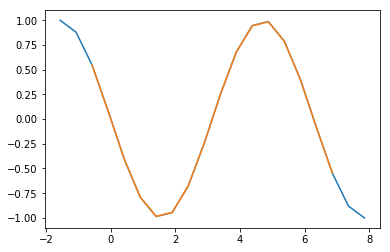

In [12]:
[points_ed, approx_derivatives_ed] = ed_differentiation(points)
py.plot(points,derivatives)
py.plot(points_ed,approx_derivatives_ed)
py.show()

In [13]:
def mean_sq_errors_diff_method(start_point,end_point,step_sizes,diff_method):
    mean_squared_errors = np.array([])
    error = False
    for step_size in step_sizes:
        number_point_float = np.floor((end_point-start_point)/step_size)
        number_point = number_point_float.astype(int)
        real_end_point = start_point + number_point*step_size
        eval_points = np.linspace(start_point,real_end_point,number_point)
        if(diff_method == 'fd'):
            [eval_points, approx_derivatives] = fd_differentiation(eval_points)
        elif(diff_method == 'bd'):
            [eval_points, approx_derivatives] = bd_differentiation(eval_points)
        elif(diff_method == 'cd'):
            [eval_points, approx_derivatives] = cd_differentiation(eval_points)
        elif(diff_method == 'ed'):
            [eval_points, approx_derivatives] = ed_differentiation(eval_points)
        else:
            error = True
            break
        analytic_derivatives = test_dfunction(eval_points)
        differences = analytic_derivatives - approx_derivatives
        mean_squared_error = np.dot(differences,differences)/len(differences)
        mean_squared_errors = np.append(mean_squared_errors,mean_squared_error)   
    return(mean_squared_errors,error)

In [14]:
number_point_float = np.floor(2*np.pi/0.1)
number_point = number_point_float.astype(int)

In [15]:
start_point = 0
end_point = 2*np.pi
step_sizes = np.logspace(-6,0,10)
[MRSQ_fd,error_fd] = mean_sq_errors_diff_method(start_point,end_point,step_sizes,'fd')
[MRSQ_bd,error_bd] = mean_sq_errors_diff_method(start_point,end_point,step_sizes,'bd')
[MRSQ_cd,error_cd] = mean_sq_errors_diff_method(start_point,end_point,step_sizes,'cd')
[MRSQ_ed,error_ed] = mean_sq_errors_diff_method(start_point,end_point,step_sizes,'ed')

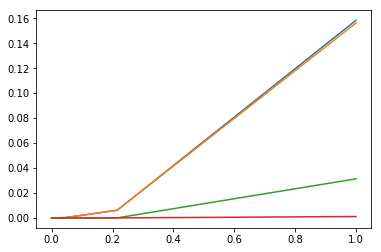

In [18]:
py.plot(step_sizes,MRSQ_fd)
py.plot(step_sizes,MRSQ_bd)
py.plot(step_sizes,MRSQ_cd)
py.plot(step_sizes,MRSQ_ed)
py.show()